In this short video we're going to talk about a really common task in applied data science, which is the
resampling of time data. This is often done when you have say, intermittent data which you want to make more
regular, or when you have really fine grained data and you want to get more general trends of it.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Resampling and Frequency Conversion

In [4]:
# Resampling refers to the process of converting a time series from one frequency to another. Converting from
# a higher frequency to a lower frequency is called downsampling and the other way around is called
# upsampling. There is another type of sampling, which is neither upsampling or downsampling such asbchanging a
# weekly Wednesday value into a weekly Sunday value.

# Resampling is useful and commonly used in manipulating time related data. Now let's see how it is done in
# Pandas.

In [5]:
# First, let's create some datimeindex using date_range() function. We can set either start or end, and
# specify the frequency and number of periods. Here we set date as Jan 1st 2018 and end as May 31st 2018 and
# use the dates in creating a series with random numbers
dates = pd.date_range(start='1/1/2018', end='05/31/2018')
ts = pd.Series(np.random.randn(len(dates)), index=dates)
ts.head()

2018-01-01   -2.295670
2018-01-02    1.074604
2018-01-03    0.662523
2018-01-04    0.634217
2018-01-05    0.660688
Freq: D, dtype: float64

In [6]:
# Now let's try downsampling. Two important things need to be considered when downsampling. First, which side
# of each interval is closed. Let's say we want to converting daily frequency to weekly frequency. You need to
# chop up the data into one week intervals. Each interval is said to be half-open. A data point can only
# belong to one interval and the union of the intervals must make up the whole time frame.

# Secondly, we need to decide how the new aggregated bins should be labeled. Either from the start of the
# interval or the end of the interval.

# Let's look at an example using the Series we just created. Here we want to convert daily to weekly. We can
# use the resample() function. The resample function has parameters for specifying the new frequency, which
# side is closed. After that, we also have to decide what kind of aggreate function we want to do with each
# interval.

# Here, we specify the frequency as weekly, which is W, and the closed side is right, aggregate function is
# mean
ts.resample('W', closed='right').mean().head()

2018-01-07   -0.435824
2018-01-14   -0.223084
2018-01-21   -0.410684
2018-01-28   -0.350141
2018-02-04   -0.115697
Freq: W-SUN, dtype: float64

In [7]:
# Let's just take a look under the hood, what is this object returned by resample()?
type(ts.resample('W', closed='right'))

pandas.core.resample.DatetimeIndexResampler

In [8]:
# This object allows us to resample pretty much however we want, through use of the agg() function, but it
# also holds many of the common functions we might use, such as mean(). For instance, if we just wanted to
# count all of the data values that were being resampled, we could use len() and write our own lambda
ts.resample('W', closed='right').agg(lambda x: len(x)).head()

2018-01-07    7.0
2018-01-14    7.0
2018-01-21    7.0
2018-01-28    7.0
2018-02-04    7.0
Freq: W-SUN, dtype: float64

In [9]:
# If we pay attention to the bottom of the output, where it says the frequency is "W-SUN", it means weekly on
# Sunday. If we want to do another day, for instance, Wednesday, we can do "W-WED"

# After converting the frequency, Pandas also allows us to adjust the labels with the loffset parameter. If we
# change the daily frequency to monthly frequency, and set the loffset to -1d, which is a month backward,
# let's see and example.
ts.resample('M', closed='right', label='right', loffset='-1M').mean()

2017-12-31   -0.368839
2018-01-31    0.108740
2018-02-28    0.079344
2018-03-31   -0.314938
2018-04-30    0.042032
Freq: M, dtype: float64

In [10]:
# Another popular and useful approach to aggregate is to compute four values for each bucket: the first, last,
# maximum, and minimal values. By using the ohlc() function, we can get a dataframe with the new frequency
# indices and four columns containing the four values at each time period
ts.resample('M', closed='right', label='right', loffset='-1M').ohlc()

,open,high,low,close
2017-12-31,-2.295670,2.009649,-2.798769,0.835661
2018-01-31,-0.178087,2.008406,-1.673119,-1.673119
2018-02-28,-0.447386,2.551093,-2.316991,-1.626243
2018-03-31,2.548476,2.548476,-2.356873,0.122144
2018-04-30,-0.768660,2.114745,-1.581681,2.114745


In [11]:
# This is a pretty common financial data routine, as you might guess from the names of the columns, but you
# can write your own functions and pass them to agg() or apply() as you see fit.

In [12]:
# Now let's talk about upsampling. Since we are converting lower frequency to higher frequency, there is no
# need to aggregate. We use the asfreq() function to convert to the higher frequency without any aggregation

# let's create a dataframe, with two weekly indices, and four columns. First the indicies
dates = pd.date_range(start='1/1/2018', periods=2, freq='W')
# now let's fill in the DataFrame
df = pd.DataFrame(np.random.randn(2,4), index=dates, 
                  columns=['col1','col2','col3','col4'])
df.head()

,col1,col2,col3,col4
2018-01-07,-0.152922,0.112044,-1.507077,0.538322
2018-01-14,-0.058149,-0.509114,0.722507,-0.065170


In [13]:
# Now we upsample from weekly frequency to daily frequency,
# we use the resample() function with frequency to "D" and the asfreq() function
df_daily = df.resample('D').asfreq()
df_daily.head()

,col1,col2,col3,col4
2018-01-07,-0.152922,0.112044,-1.507077,0.538322
2018-01-08,NaN,NaN,NaN,NaN
2018-01-09,NaN,NaN,NaN,NaN
2018-01-10,NaN,NaN,NaN,NaN
2018-01-11,NaN,NaN,NaN,NaN


In [14]:
# As you notice, there will be NaN values in some cells because we are upsampling and we do not have the data
# for some of the new intervals. If you want to fill the NaN values, which is called interpolation, you can
# either use ffill(), which we have talked about and is forward filling; or bfill() which is backward filling.
# Or you can use fillna() or reindex() methods.

# In our dataframe, it makes sense to do forward filling, now let's try it
df.resample('D').ffill()

,col1,col2,col3,col4
2018-01-07,-0.152922,0.112044,-1.507077,0.538322
2018-01-08,-0.152922,0.112044,-1.507077,0.538322
2018-01-09,-0.152922,0.112044,-1.507077,0.538322
2018-01-10,-0.152922,0.112044,-1.507077,0.538322
2018-01-11,-0.152922,0.112044,-1.507077,0.538322
2018-01-12,-0.152922,0.112044,-1.507077,0.538322
2018-01-13,-0.152922,0.112044,-1.507077,0.538322
2018-01-14,-0.058149,-0.509114,0.722507,-0.065170


In [15]:
# We can also choose to only fill a certain number of periods, by using the limit parameter in the ffill()
# function. For instance, here, we are limiting to interpolating three observations
df.resample('D').ffill(limit=3)

,col1,col2,col3,col4
2018-01-07,-0.152922,0.112044,-1.507077,0.538322
2018-01-08,-0.152922,0.112044,-1.507077,0.538322
2018-01-09,-0.152922,0.112044,-1.507077,0.538322
2018-01-10,-0.152922,0.112044,-1.507077,0.538322
2018-01-11,NaN,NaN,NaN,NaN
2018-01-12,NaN,NaN,NaN,NaN
2018-01-13,NaN,NaN,NaN,NaN
2018-01-14,-0.058149,-0.509114,0.722507,-0.065170


## Moving Window Functions

In [16]:
# An important group of manipulation techniques on time series are focused on over a sliding window or with
# exponentially decaying weights. This is very useful for smoothing noisy or gappy data. Note that these kinds
# of functions automatically exclude missing data.

# Now let's look at examples on the stock market. We are going to look at Apple and Microsoft's daily stock
# price from 2012 to 2018
apple = pd.read_csv("datasets/AAPL.csv")
ms = pd.read_csv("datasets/MSFT.csv")

apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,58.485714,58.928570,58.428570,58.747143,39.172771,75555200
1,2012-01-04,58.571430,59.240002,58.468571,59.062859,39.383293,65005500
2,2012-01-05,59.278572,59.792858,58.952858,59.718571,39.820515,67817400
3,2012-01-06,59.967144,60.392857,59.888573,60.342857,40.236809,79573200
4,2012-01-09,60.785713,61.107143,60.192856,60.247143,40.172970,98506100


In [17]:
# As we see here, we have different kinds of pricing. For the analysis we are going to do, we will use close
# price. Let's combine Apple and Microsoft's daily prices together into one dataframe.
df = pd.DataFrame({'AAPL': apple['Close'],'MSFT':ms['Close']})
df.head()

,AAPL,MSFT
0,58.747143,26.770000
1,59.062859,27.400000
2,59.718571,27.680000
3,60.342857,28.110001
4,60.247143,27.740000


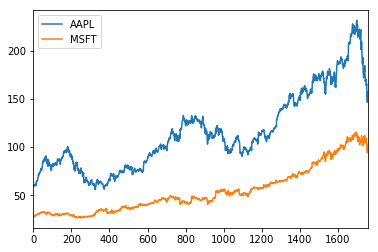

In [18]:
# Now let's plot the prices over the years
df.plot()
plt.show()

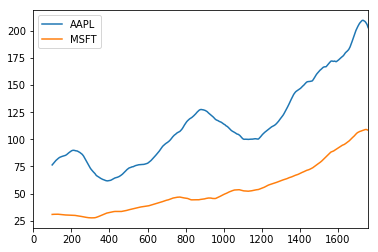

In [19]:
# Now we are going to learn the rolling operator, which behaves similarly to resample and groupby. It can be
# called on a Series or a Dataframe along with a window, which is a number of periods to cover. The number we
# specify in rolling() function means the sliding window we are group by. For example, if we do 100, that is
# grouping over a 100-day sliding window

# Here, let's do a 100 day rolling window where we average the values and plot it.
df.rolling(100).mean().plot()
plt.show()

In [20]:
# You can see that this not only smoothed the data, but we lost the big dropped at the end of the time period
# for apple because of the size of our window. Try playing with a few window values yourself and get a sense
# for how that might change the insights you derive from the data.

Now we've just touched the very basics of manipulating time series data in python. These techniques will be
useful for conducting further time series analysis and for more advanced data visualization on time related
data, as well as when dealing with feature engineering from time series sources.